In [39]:
#STANDARD IMPORTS
import pandas as pd
import imblearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

#IMPORTS FOR THE MULTICLASS SMOTE
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [40]:
#REMOVING INDEX COLUMN, ROWS WITH NaN VALUES, RESETTING INDEX
df = pd.read_csv(r"C:\Users\flytr\Downloads\Data Files\newPFAS.csv")
df = df.loc[:,df.columns!="Unnamed: 0"]
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [41]:
#RENAMING COLUMNS
df.rename(columns={'N_D_MINOR_PER_MEAN': 'MINOR_PER', 'N_D_INCOME_PER_MEAN': 'INCOME_PER','N_D_LESSHS_PER_MEAN': 'LESSHS_PER', 'N_D_UNEMPLOYED_PER_MEAN': 'UNEMPLOYED_PER','N_D_INDEX_PER_MEAN': 'INDEX_PER'}, inplace=True)

Class=1, n=2054 (88.079%)
Class=4, n=93 (3.988%)
Class=2, n=93 (3.988%)
Class=3, n=92 (3.945%)


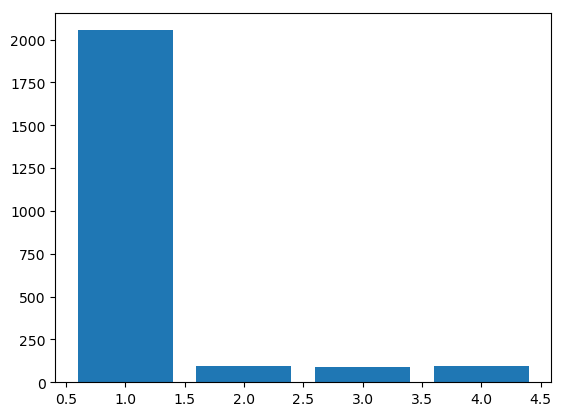

In [42]:
#SHOWS THE IMBALANCE IN THE DATASET
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [44]:
#BALANCING THE DATASET USING SMOTE METHOD--> OVERSAMPLING ALL VALUES
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#GRAPHICALLY DESCRIBING
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [35]:
#SPLITTING DATAFRAME INTO X,y
X = df.loc[:,df.columns!="value"]
y = df['value']

In [6]:
#SPLITTING X,y INTO TRAIN,TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [14]:
#SCALING/STANDARDIZING THE DATA
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
#FITTING THE TWO BASIC MODELS
rbf = svm.SVC(kernel='rbf',gamma = 0.5, C=0.1).fit(X_train_std,y_train)
poly = svm.SVC(kernel='poly',degree = 3, C=1).fit(X_train_std, y_train)

In [10]:
#TO CALCULATE EFFICIENCY OF MODEL
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [16]:
#PREDICTING ONE SPECIFIC VALUE
specific_pred = rbf.predict([[-0.93999655, -0.86462846,  0.54911492,  1.2649164 , -1.21416516]])

In [24]:
#CALCULATING ACCURACY OF THE POLYNOMIAL MODEL
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  71.27
F1 (Polynomial Kernel):  75.78


In [25]:
#CALCULATING ACCURACY OF RBF MODEL
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  90.42
F1 (RBF Kernel):  85.88
